In [2]:
from zipfile import ZipFile
import pandas as pd 
import textacy.preprocessing as tprep
import re
import os
import nltk 
nltk.download("punkt")
import string
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

C:\Users\oscar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\oscar\anaconda3\lib\site-packages\torch\cuda\__init__.py:651: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
os.mkdir("../data/raw_data")
with ZipFile("../data/arabic_dataset.zip") as f:
    f.extractall("../data/raw_data")


In [9]:
with ZipFile("../data/raw_data/arabic_dataset_classifiction.csv.zip") as f:
    f.extractall("../data/raw_data/")

In [3]:
df = pd.read_csv("../data/raw_data/arabic_dataset_classifiction.csv")
df.head()

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111728 entries, 0 to 111727
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    108789 non-null  object
 1   targe   111728 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
#remove null values
print("shape before dropping missing values " , df.shape) 
df.dropna(inplace=True)
print("shape after dropping missing values ", df.shape)

shape before dropping missing values  (111728, 2)
shape after dropping missing values  (108789, 2)


In [14]:
df['targe'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [17]:
mapping = {0 :'sport',  1 : 'politic', 2 : 'culture', 3: 'economy' , 4 :'diverse'}
df['targe'] = df['targe'].map(mapping)


In [20]:
df.dtypes

text     object
targe    object
dtype: object

In [4]:
df['text'] = df['text'].astype(str)
df['targe'] = df['targe'].astype(str)

In [22]:
print(df.sample(1).iloc[:,0].values[0])

ينظم موقع أنصار فريق الرجاء الرياضي استفتاء لجائزة أحسن لاعب رجاوي لسنة وسيتم اختياره عبر تصويت الجمهور من خلال صفحة الموقع الاجتماعي فيسبوك وضمت اللائحة التي سيختارها الجمهور كلا من الحارس خالد العسكري والعميد أمين الرباطي والإيفواري كوكو دجيدجي والمهاجم ياسين الصالحي وعبد الإله الحافيظي بالإضافة إلى المدافع محمد أولحاج ورشيد السليماني وابتدأ التصويت منذ الأربعاء الماضي إلى غاية من الشهر الحالي وكان محسن متولي تسلم جائزة أحسن لاعب رجاوي للموسم الماضي خلال المباراة الإعدادية التي جمعت الرجاء الرياضي وأتلتيك بيلباو الإسباني يذكر أنها المرة السادسة التي ينظم فيها استفتاء اختيار أحسن لاعب رجاوي عصام أيت علي صحافي متدرب


In [5]:
df['text_len'] = df['text'].apply(len)

In [6]:
df['text_len'].head()

0    1890
1     464
2     939
3    1113
4    1431
Name: text_len, dtype: int64

In [7]:
#data cleaning satge 

In [8]:
#check if there are urls in data
assert df['text'].apply(lambda x : len(re.findall(r'https?://\S+|www\.\S+' , x))).sum() == 0 , "there are urls in text"

In [9]:
def clean_text(text):
    if not isinstance(text , str) or len(text) < 1:
        return ""
    
    
    #remove puncutation
    text = tprep.remove.punctuation(text)
    
    #remove any numbers it not useful in topic modeling 
    text = re.sub(r"\d+" , "" , text)
    
    #remove any characters expected arabic letters 
    regex_for_non_rabaic = re.compile(r"[%s]"%string.ascii_letters)
    
    text = regex_for_non_rabaic.sub("" , text)
    
    text = tprep.normalize.unicode(text)
    #from analyzing i have found emoiji in data 
    text = tprep.replace.emojis(text , "")
    
    words = [word for word in nltk.tokenize.word_tokenize(text ) if len(word) > 1]
    
    text = " ".join(words)
    
    #remove repeated spaces 
    text = tprep.normalize.whitespace(text)
    
    
    return text


In [10]:
df['text_cleaned'] = df['text'].apply(clean_text)


In [11]:
df.head()

,text,targe,text_len,text_cleaned
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,1890,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,464,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,939,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,1113,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,1431,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...


In [12]:
df['text_cleaned_len'] = df['text_cleaned'].apply(len)

In [13]:

np.allclose(df['text_len'].values , df["text_cleaned_len"].values)

False

In [14]:
(np.abs(df['text_len'] - df['text_cleaned_len'])).sum()

170882

c:\Users\oscar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oscar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


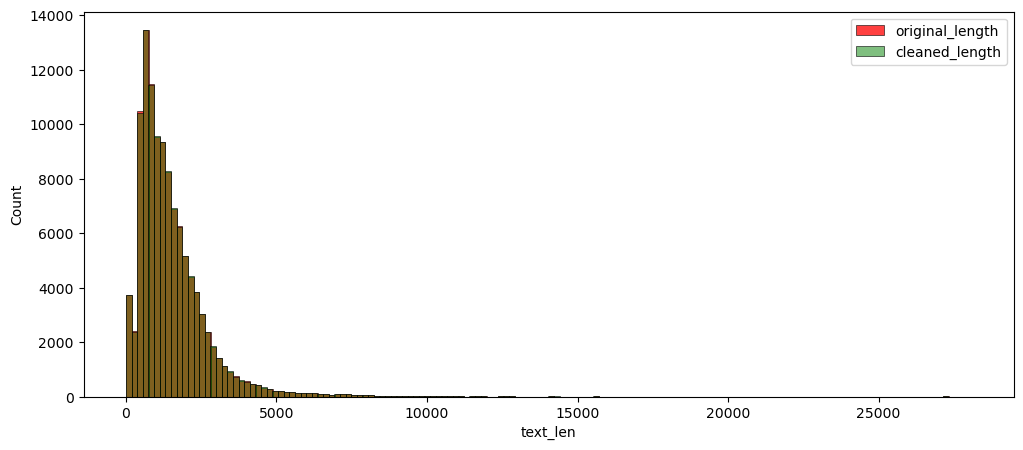

In [15]:
fig , ax = plt.subplots(1,1,figsize = (12,5))
sns.histplot(df['text_len'] , bins = 150 , ax=ax , color="red",)
sns.histplot(df['text_cleaned_len'], bins = 150 , ax = ax , color='green', alpha = 0.5)
ax.legend(['original_length' , "cleaned_length"])

In [16]:
#most of data lengthes will not changed a lot 

In [17]:
df_cleaned = df[(df['text_cleaned_len'] < 8000) & (df['text_cleaned_len'] > 1)][['text_cleaned' , 'targe']]
df_cleaned.shape

(108354, 2)

In [18]:
#check if threre are duplicated 
assert df_cleaned.duplicated(subset=['text_cleaned']).sum()==0 , "there are duplicated texts"

AssertionError: there are duplicated texts

In [ ]:
print("shape of data before removing duplicated is " , df_cleaned.shape)
df_cleaned.drop_duplicates(subset=['text_cleaned'] , inplace=True)
print("shape of data after removing duplicated is " , df_cleaned.shape)

shape of data before removing duplicated is  (108354, 2)
shape of data after removing duplicated is  (105091, 2)


In [19]:
#save cleaned data 
os.makedirs("../data/cleaned_data")
df_cleaned.to_csv("../data/cleaned_data/cleaned_data.csv" , index=False , header=True)